In [1]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

#numpy and pandas for data manipulation
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold

from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

from itertools import product


samples = pd.read_csv('preprocessed-75.csv')

In [2]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in samples:
    if samples[col].dtype == 'bool':
        # If 2 or fewer unique categories
        if len(list(samples[col].unique())) <= 2:
            # Train on the training data
            le.fit(samples[col])
            # Transform 
            samples[col] = le.transform(samples[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
print('%d columns were label encoded.' % le_count)

train_label = samples['TARGET']
samples = samples.drop(columns=['TARGET'])

# one-hot encoding of categorical variables
samples = pd.get_dummies(samples)

print('Training data shape: ', samples.shape)

pipeline = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')),
             ('pca', PCA())])

train_pca = pipeline.fit_transform(samples)


8 columns were label encoded.
Training data shape:  (307507, 848)


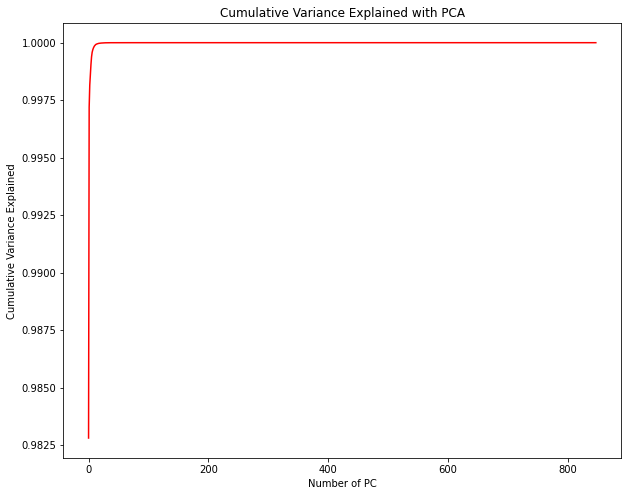

In [3]:
pca = pipeline.named_steps['pca']

plt.figure(figsize = (10, 8))
plt.plot(list(range(samples.shape[1])), np.cumsum(pca.explained_variance_ratio_), 'r-')
plt.xlabel('Number of PC'); plt.ylabel('Cumulative Variance Explained');
plt.title('Cumulative Variance Explained with PCA');

In [4]:
samples.shape[1]

848

In [5]:
print('2 principal components account for {:.4f}% of the variance.'.format(100 * np.sum(pca.explained_variance_ratio_[:2])))

2 principal components account for 99.7194% of the variance.


In [6]:
len(train_pca[0])

848

In [7]:
pca.explained_variance_ratio_[:2]

array([0.98280801, 0.01438587])

In [9]:
x_train,x_test, y_train, y_test = train_test_split([x[:250] for x in train_pca], train_label, test_size=0.2)

In [ ]:
# 80-20 train-test case
kf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
log_reg = LogisticRegression(C = 0.001, max_iter=200, solver='sag', fit_intercept=True,
                             class_weight='balanced')
y_pred = cross_val_predict(estimator=log_reg , X=x_train, y=y_train, cv=kf)
from sklearn import metrics

print(metrics.confusion_matrix(y_train, y_pred))
# print(metrics.classification_report(train_label ,y_pred))
print("roc - {}".format(metrics.roc_auc_score(y_train, y_pred)))

In [ ]:
train_pca

In [ ]:
len([x[:250] for x in train_pca])

In [ ]:
len(samples)